# ERA5の風データを用いた描画

ERA5 monthly data download
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form

## 風データ

データ取得

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math

year = 2019
month = 7

wind_data = pl.read_csv("wind_datas/era5_testdata_E180W90S0W90_" + str(int(year)) + "_" + str(int(month)) + ".csv",encoding="shift-jis")

### 風の描画

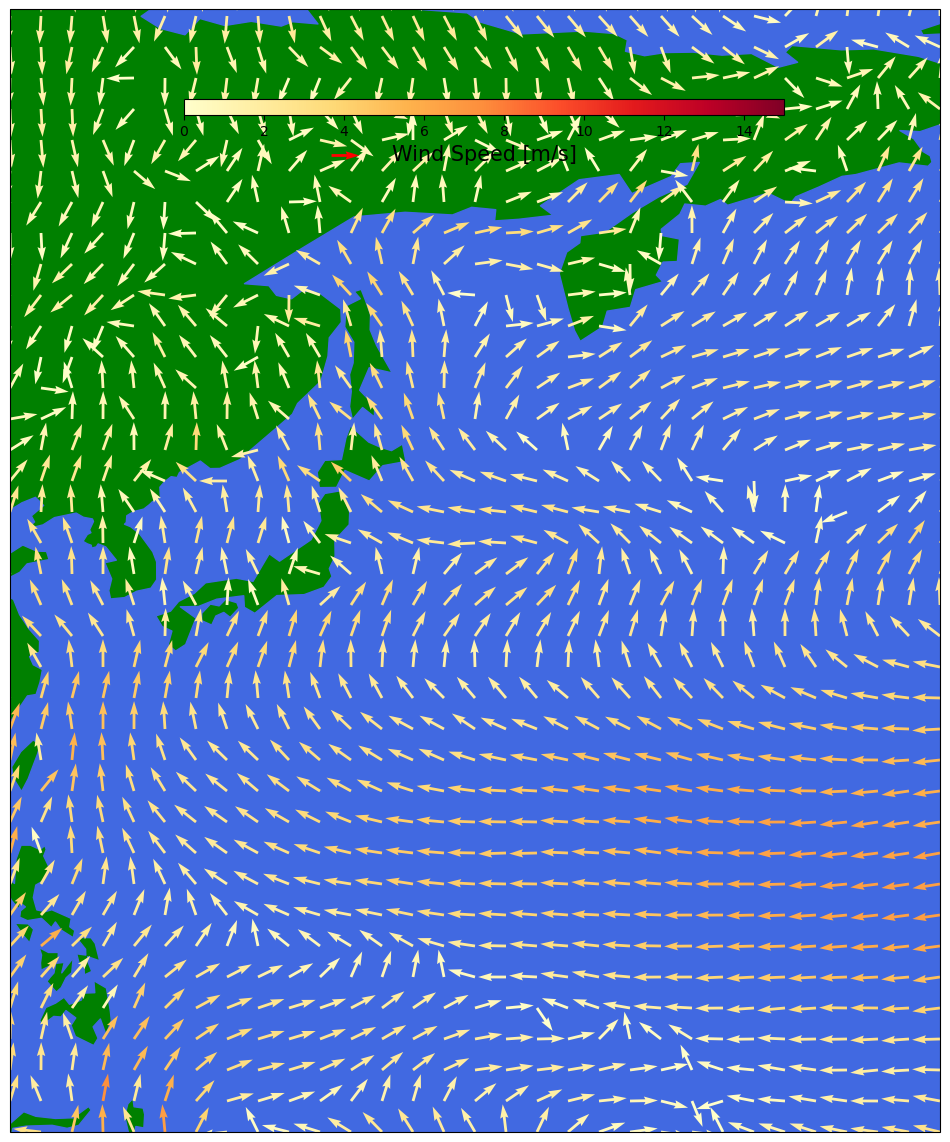

In [6]:
#LONとLATが偶数の時のみのデータを抽出
wind_data = wind_data.filter(wind_data['LON'] % 2 == 0)
wind_data = wind_data.filter(wind_data['LAT'] % 2 == 0)

#データサイズがでかいので分割が必要となった
lon = wind_data[:]['LON'] # 経度データ読み込み
lat = wind_data[:]['LAT'] # 緯度データ読み込み
wind_u = wind_data[:]["U10_E+_W-[m/s]"]
wind_v = wind_data[:]["V10_N+_S-[m/s]"]

fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し
size = 10

ax.add_feature(cfeature.LAND, color='g') # 陸を緑色で塗り潰す
ax.add_feature(cfeature.OCEAN, color='royalblue') # 海を水色で塗り潰す
ax.set_extent([120, 180, 0, 70], ccrs.Geodetic())
#ax.set_extent([160, 180, 50, 70], ccrs.Geodetic())

for i in range(len(lat)):
    if not math.isnan(wind_u[i]):
        #風矢印表示
        size = 12
        vec_size = (np.sqrt((wind_u[i])**2 + (wind_v[i])**2))
        Q_wind = ax.quiver(lon[i], lat[i], wind_u[i]/vec_size*size, wind_v[i]/vec_size*size, vec_size,cmap = 'YlOrRd', clim = (0,15), width=.003, scale=400.)
        


#風カラーバー表示
ax.quiverkey(Q_wind, 0.36, 0.87, size, '', color='r', labelsep=0.03)
cax = fig.add_axes([0.27, 0.78, 0.5, 0.01])
fig.colorbar(Q_wind, cax=cax, orientation="horizontal").set_label("Wind Speed [m/s]",size=15)
